In [1]:
                                                #Task 3
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA



In [2]:
# Step 1: Load data
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers = pd.read_csv(customers_url)
transactions = pd.read_csv(transactions_url)



In [4]:
# Step 2: Data preprocessing
if 'CustomerID' in customers.columns and 'CustomerID' in transactions.columns:
    data = pd.merge(customers, transactions, on='CustomerID', how='inner')
else:
    raise ValueError("CustomerID column missing in one of the datasets")
data = data.dropna()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
features = data[numerical_cols]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [5]:
# Step 3: Clustering using K-Means
db_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    db_index = davies_bouldin_score(scaled_features, labels)
    db_scores.append(db_index)

# Optimal number of clusters
best_k = k_range[np.argmin(db_scores)]
print(f"Optimal number of clusters: {best_k}")

# Train K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_features)



Optimal number of clusters: 8


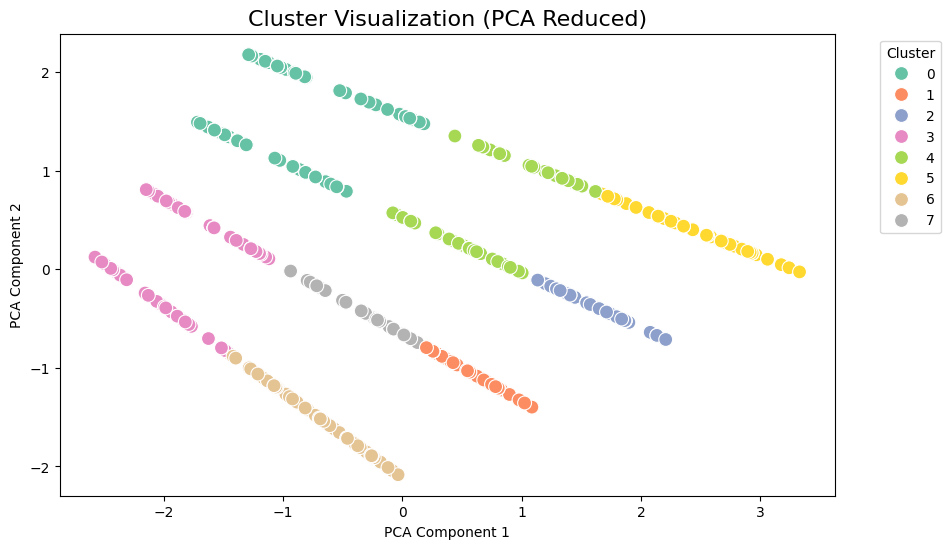

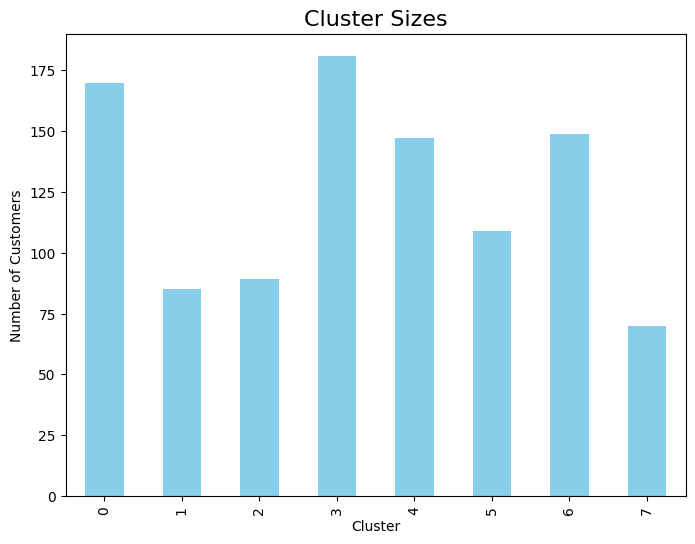

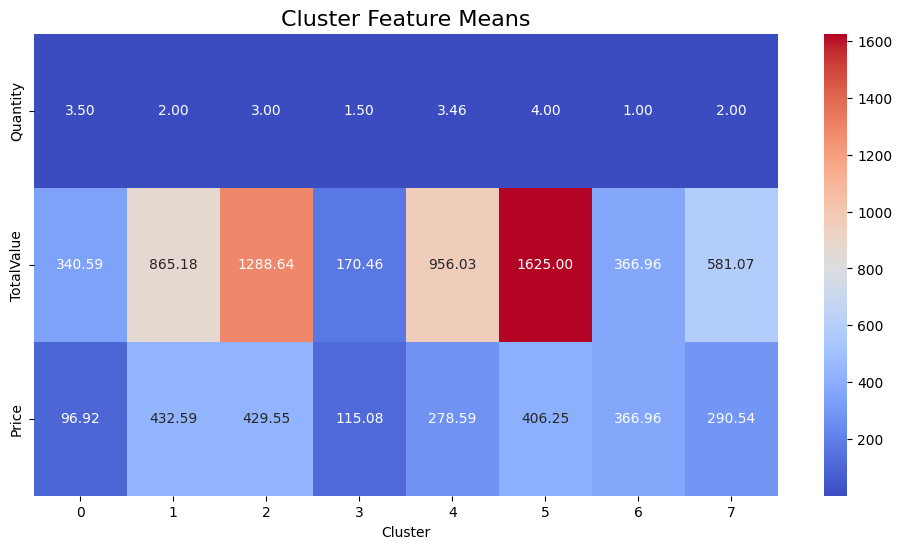

In [6]:
# Step 4: Visualize clusters

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette='Set2', s=100)
plt.title("Cluster Visualization (PCA Reduced)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Bar plot of cluster sizes
cluster_sizes = data['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title("Cluster Sizes", fontsize=16)
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

# Heatmap of average feature values per cluster
cluster_means = data.groupby('Cluster')[numerical_cols].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Cluster Feature Means", fontsize=16)
plt.show()




In [7]:
# Step 5: Report metrics
print(f"Davies-Bouldin Index for {best_k} clusters: {min(db_scores):.3f}")
print(f"DB Scores for each k: {db_scores}")

Davies-Bouldin Index for 8 clusters: 0.644
DB Scores for each k: [np.float64(0.9442477624220227), np.float64(0.8170978638768145), np.float64(0.7517439301142246), np.float64(0.797269284058556), np.float64(0.7970380384235735), np.float64(0.7032491744348744), np.float64(0.644068825312793), np.float64(0.7229259587097557), np.float64(0.7574187526433286)]
